# Unsupervised Learning

In this notebook you will get familiar with the most popular dimensionality reduction and clustering algorithms.

## Dimensionality Reduction

Dimensionality reduction methods are used to reduce the dimensionality of a dataset. These are commonly used
for data exploration or to fight the curse of dimensionality when training supervised learning methods.

In order to be able to see how these algorithms behave, we will look at some examples of data living in a 3D
space that we would like to reduce to a 2D space.

The first dimensionality reduction method that we will look at is a projection method,
the Principal Component Analysis (PCA), then we will look at a manifold method, the Locally Linear Embeddings (LL).

### PCA

PCA seeks to find a hyperplane such that when projecting the original dataset onto it explains its largest variability.
In order to see PCA in action, we will generate a very simple dataset.
Let's now build a cloud of data points with the shape of an open ring in a 3D space.

In [1]:
import numpy as np

# number of instances
m = 500

# noise terms
ns = lambda: 0.05 * np.random.randn(m)

# if you wish to close the ring you should remove the last term (15/16).
angles = np.random.rand(m) * 2 * np.pi * 15 / 16
xs = np.empty((m, 3))

xs[:, 0] = np.cos(angles) + np.sin(angles) + ns()
xs[:, 1] = np.sin(angles) * 0.7 + ns()
xs[:, 2] = xs[:, 0] * 0.1 + xs[:, 1] * 0.3 + ns()

We will now plot the dataset that we have just generated.

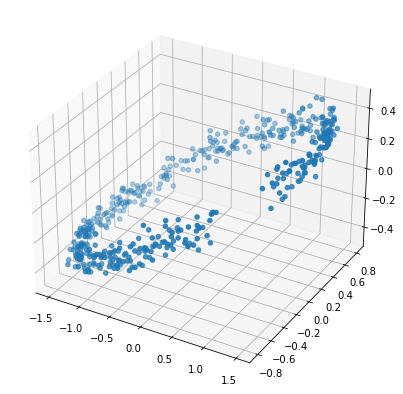

In [2]:
import matplotlib.pyplot as plt

def plot_3d(xs, c=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs[:,0], xs[:,1], xs[:,2], c=c)
    plt.show()

plot_3d(xs)

This dataset has been generated with a dimensionality that can be visualized. However, imagine what we could have done
if this was not the case. We could have plotted each dimension against the other as follows:

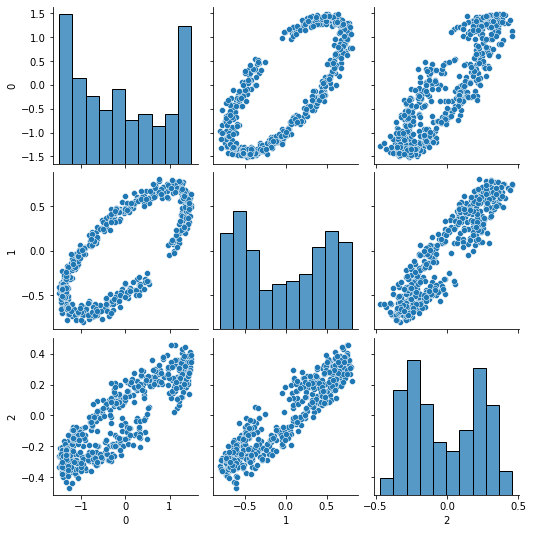

In [3]:
import seaborn as sns
import pandas as pd

sns.pairplot(pd.DataFrame(xs))

Given the simplicity of the dataset, in this plots we can infer already a lot about the content of this dataset:
The shape lies on a 2D dimensional plane because out of the 3 plots only one has a shape that does not resemble a line.
However, for a dataset with a larger number of features or with more complicated feature interactions this strategy
would have not led us to anything useful. In these cases PCA may help us understand the dataset better.

We will use the scikit-learn implementation of PCA. This takes as a parameter the number of components, which is the
dimensionality of the hyperplane where the PCA will project the data.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xs_2d = pca.fit_transform(xs)

print('The first 5 projected points:')
xs_2d[:5]

The first 5 projected points:


array([[ 1.28732362,  0.32910398],
       [ 0.84557421, -0.31218558],
       [-1.42852336,  0.03830083],
       [ 0.76069701, -0.40766634],
       [ 0.10318402,  0.5398897 ]])

Let's now plot the result of this projection in a 2D plot:

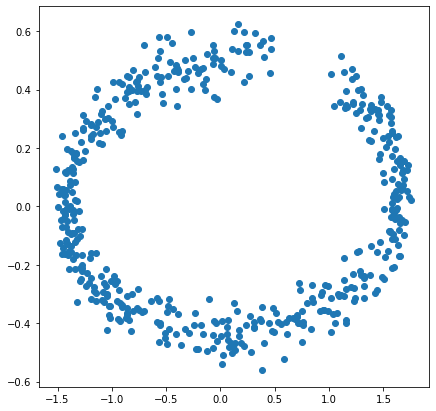

In [5]:
def plot_2d(xs, c=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    ax.scatter(xs[:, 0], xs[:, 1], c=c)
    plt.show()

plot_2d(xs_2d)

In this example, PCA has successfully projected the 3D shape into a 2D space without loosing much information about
the original shape.

## Locally Linear Embeddings

Locally Linear Embeddings (LL) is a manifold based method. Manifold based methods assume that the data points do not
come from the whole space but from a manifold.

To test this algorithm we will generate our points using a helper function provided by scikit-learn. We will
generate points with a shape of a swiss roll. Our goal is to unfold the swiss roll using LL.
In this example we will also have a color indicator to better see which data points should be considered closer.

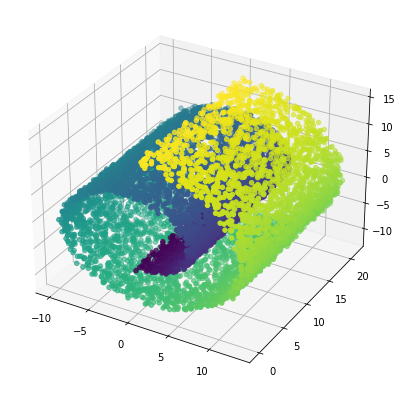

In [6]:
from sklearn.datasets import make_swiss_roll
xs, ys = make_swiss_roll(n_samples=10000, noise=0.2)

plot_3d(xs, ys)

If we were to use a linear project, we would not be able to unfold the swiss roll.
Following an example of such a projection using two dimensions.

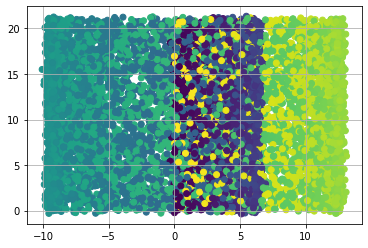

In [7]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
plt.grid(True)


We will now use the LL implementation of scikit-learn. LL takes as parameters, the number of components,
which is similar to PCA, and the number of neighbors LL should consider in order to reconstruct the manifold.

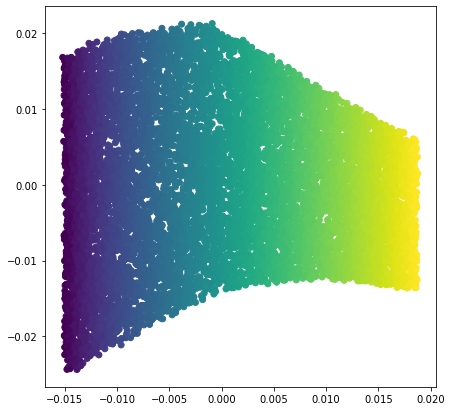

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
xs_2d = lle.fit_transform(xs)

plot_2d(xs_2d, ys)

Here you can see that data points that have a similar color are closer to each other, meaning that the swiss roll has
been properly unfolded.

## Clustering

Clustering algorithms are used to find groups in data. In this notebook we will review some of the most popular
algorithms. We will start with K-Means, then DBSCAN, and conclude with Gaussian Mixture models.

### K-Means

K-means is a simple and effective algorithm. In order to test this algorithm we will generate a dataset made of blobs.

The dataset that we will generate here is made of blobs with different density.

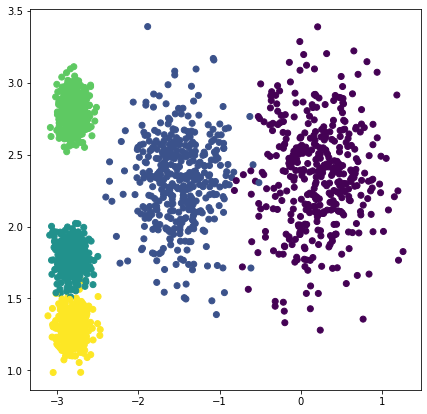

In [9]:
from sklearn.datasets import make_blobs

# the centroids of the blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# the density of each blobs
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

xs, ys = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

plot_2d(xs, ys)

A parameter of K-means is the number of clusters we are expecting to find in the dataset (the $k$). In this case, since
we have constructed the dataset ourselves, we know that the best $k$ is 5. However, normally you do not know how many
clusters to expect, and you will need to inspect your results in order to see if the result of the clustering satisfies
you.

In [10]:
from sklearn.cluster import KMeans

k = 5
k_means = KMeans(n_clusters=k)
k_means.fit(xs)

print('Centroids of the clustering algorithm:')
k_means.cluster_centers_

Centroids of the clustering algorithm:


array([[-2.80518641,  1.30234747],
       [-1.47450694,  2.31532269],
       [-2.78953424,  2.79712856],
       [ 0.21688396,  2.35253289],
       [-2.79767761,  1.80194741]])

If the K-means has successfully found all the clusters, then these centroids will be equal to the centroids we set when
generating the dataset.

To inspect this visually let's now plot the dataset with the centroids.

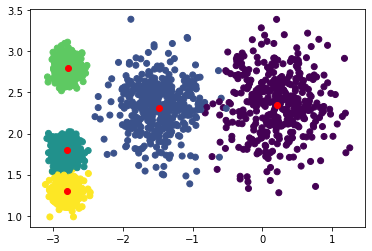

In [11]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red')
plt.show()

Once we have found the clusters, we can use k-means to predict the cluster of any new example using the predict method.

In [12]:
# we define a set of 5 points
xs_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# it will predict to which cluster these points belong
k_means.predict(xs_new)

array([3, 3, 2, 2], dtype=int32)

### DBSCAN

DBSCAN stands for Density-based spatial clustering of applications with noise (DBSCAN). This algorithm, given a set of
points in some space, groups together points that are closely packed together (points with many nearby neighbors),
marking as outliers those that lie alone in low-density regions (whose nearest neighbors are too far away).

To test this clustering algorithm we will generate a dataset made of moon shapes.

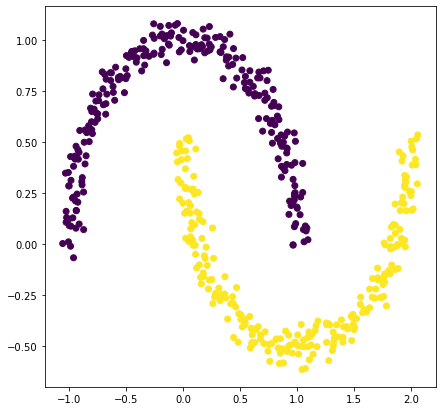

In [13]:
from sklearn.datasets import make_moons

xs, ys = make_moons(n_samples=500, noise=0.05)

plot_2d(xs, ys)

DBSCAN takes two parameters: The $\varepsilon$ distance which is used to decide at which distance a point should be
considered a neighbor, and the number of samples: the number of points that within the $\varepsilon$ distance
qualify a point as being a core-instance.

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(xs)

print('The labels provided to the first 5 points of the dataset')
dbscan.labels_[:5]

The labels provided to the first 5 points of the dataset


array([-1, 17, -1,  0,  1])

Among the $m$ points in the dataset DBSCAN has found the following number of core instances:

In [15]:
len(dbscan.core_sample_indices_)


183

DBSCAN will also tell us how many clusters it has found:

In [16]:
len(set(dbscan.labels_))

37

Let's now plot each cluster with a different color and also
those points that have been marked as anomalies.

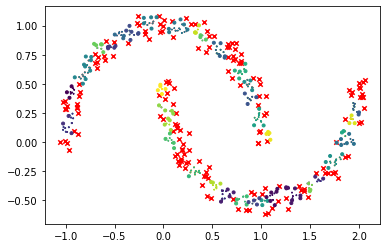

In [17]:
def plot_dbscan(model, xs):
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True
    anomalies_mask = model.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = model.components_
    anomalies = xs[anomalies_mask]
    non_cores = xs[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=1, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=1, c=model.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=20)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".")

plot_dbscan(dbscan, xs)

Given we know how many clusters are in the dataset, let's try to improve this clustering result by increasing the
$\varepsilon$ parameter.

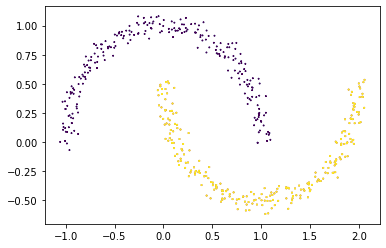

In [18]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(xs)

plot_dbscan(dbscan, xs)

### Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes that all the data points have been generated from a
mixture of a finite number of Gaussian distributions with unknown parameters.

For this model we will use the IRIS dataset.

In [19]:
from sklearn.datasets import load_iris

data = load_iris()
xs = data.data
ys = data.target

data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's now visualize this dataset.

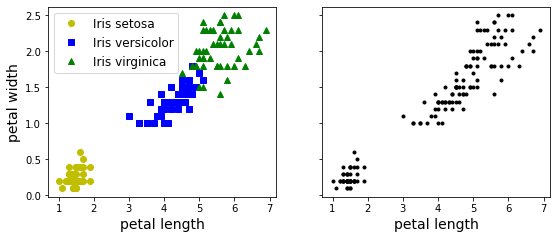

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(xs[ys==0, 2], xs[ys==0, 3], "yo", label="Iris setosa")
plt.plot(xs[ys==1, 2], xs[ys==1, 3], "bs", label="Iris versicolor")
plt.plot(xs[ys==2, 2], xs[ys==2, 3], "g^", label="Iris virginica")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(xs[:, 2], xs[:, 3], c="k", marker=".")
plt.xlabel("petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

On the left-hand side we see the dataset with the known classification and on the right-hand side we have the dataset
we will use to cluster them. From now on, we will assume that those classifications are unknown.

Similar to k-means, GMM requires the specification of the number of clusters.

In [21]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(xs)

ys_pred = gmm.predict(xs)

We can now visualize the result of this clustering.

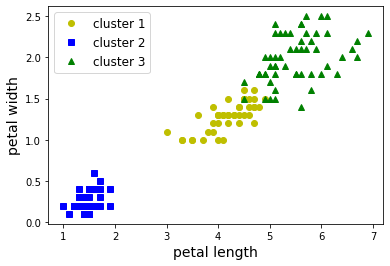

In [22]:
plt.plot(xs[ys_pred==0, 2], xs[ys_pred==0, 3], "yo", label="cluster 1")
plt.plot(xs[ys_pred==1, 2], xs[ys_pred==1, 3], "bs", label="cluster 2")
plt.plot(xs[ys_pred==2, 2], xs[ys_pred==2, 3], "g^", label="cluster 3")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

It is now up to us to give the appropriate name to these clusters.